In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from helpers import loadData, loadDataFromPath

In [3]:
# Load data
X_tr, y_tr = loadData("train")
X_te, y_te = loadData("test")


In [43]:
# Build model
model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))

In [44]:
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10,  activation='softmax'))

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)       

In [45]:
# Train model
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(X_tr, y_tr, epochs=6, batch_size=128, validation_data=(X_te, y_te))
history1 = model.fit(X_tr, y_tr, epochs=5, batch_size=256, validation_data=(X_te, y_te))
history2 = model.fit(X_tr, y_tr, epochs=5, batch_size=512, validation_data=(X_te, y_te))


Epoch 1/6
573/573 [==============================] - 56s 97ms/step - loss: 1.5311 - accuracy: 0.4598 - val_loss: 0.6330 - val_accuracy: 0.8194
Epoch 2/6
573/573 [==============================] - 55s 97ms/step - loss: 0.6179 - accuracy: 0.8122 - val_loss: 0.3445 - val_accuracy: 0.8993
Epoch 3/6
573/573 [==============================] - 56s 98ms/step - loss: 0.4516 - accuracy: 0.8686 - val_loss: 0.3185 - val_accuracy: 0.9075
Epoch 4/6
573/573 [==============================] - 56s 97ms/step - loss: 0.3805 - accuracy: 0.8915 - val_loss: 0.2829 - val_accuracy: 0.9214
Epoch 5/6
573/573 [==============================] - 56s 97ms/step - loss: 0.3424 - accuracy: 0.9031 - val_loss: 0.2776 - val_accuracy: 0.9228
Epoch 6/6
573/573 [==============================] - 56s 97ms/step - loss: 0.3116 - accuracy: 0.9120 - val_loss: 0.2551 - val_accuracy: 0.9293
Epoch 1/5
287/287 [==============================] - 51s 177ms/step - loss: 0.2670 - accuracy: 0.9243 - val_loss: 0.2091 - val_accuracy: 0.943

814/814 - 9s - loss: 0.1867 - accuracy: 0.9527 - 9s/epoch - 12ms/step
Test accuracy: 0.952673614025116


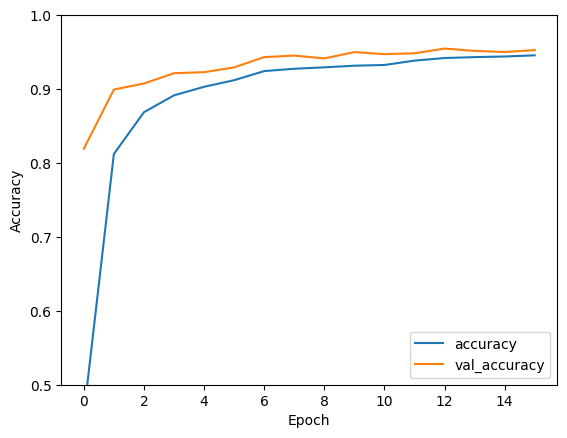

In [47]:
#Evaluate model
plt.plot(history.history['accuracy']+history1.history['accuracy']+history2.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy']+history1.history['val_accuracy']+history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#ax[1].plot(history1.history['accuracy'])
#ax[2].plot(history2)
test_loss, test_acc = model.evaluate(X_te,  y_te, verbose=2)
print("Test accuracy: {}".format(test_acc))

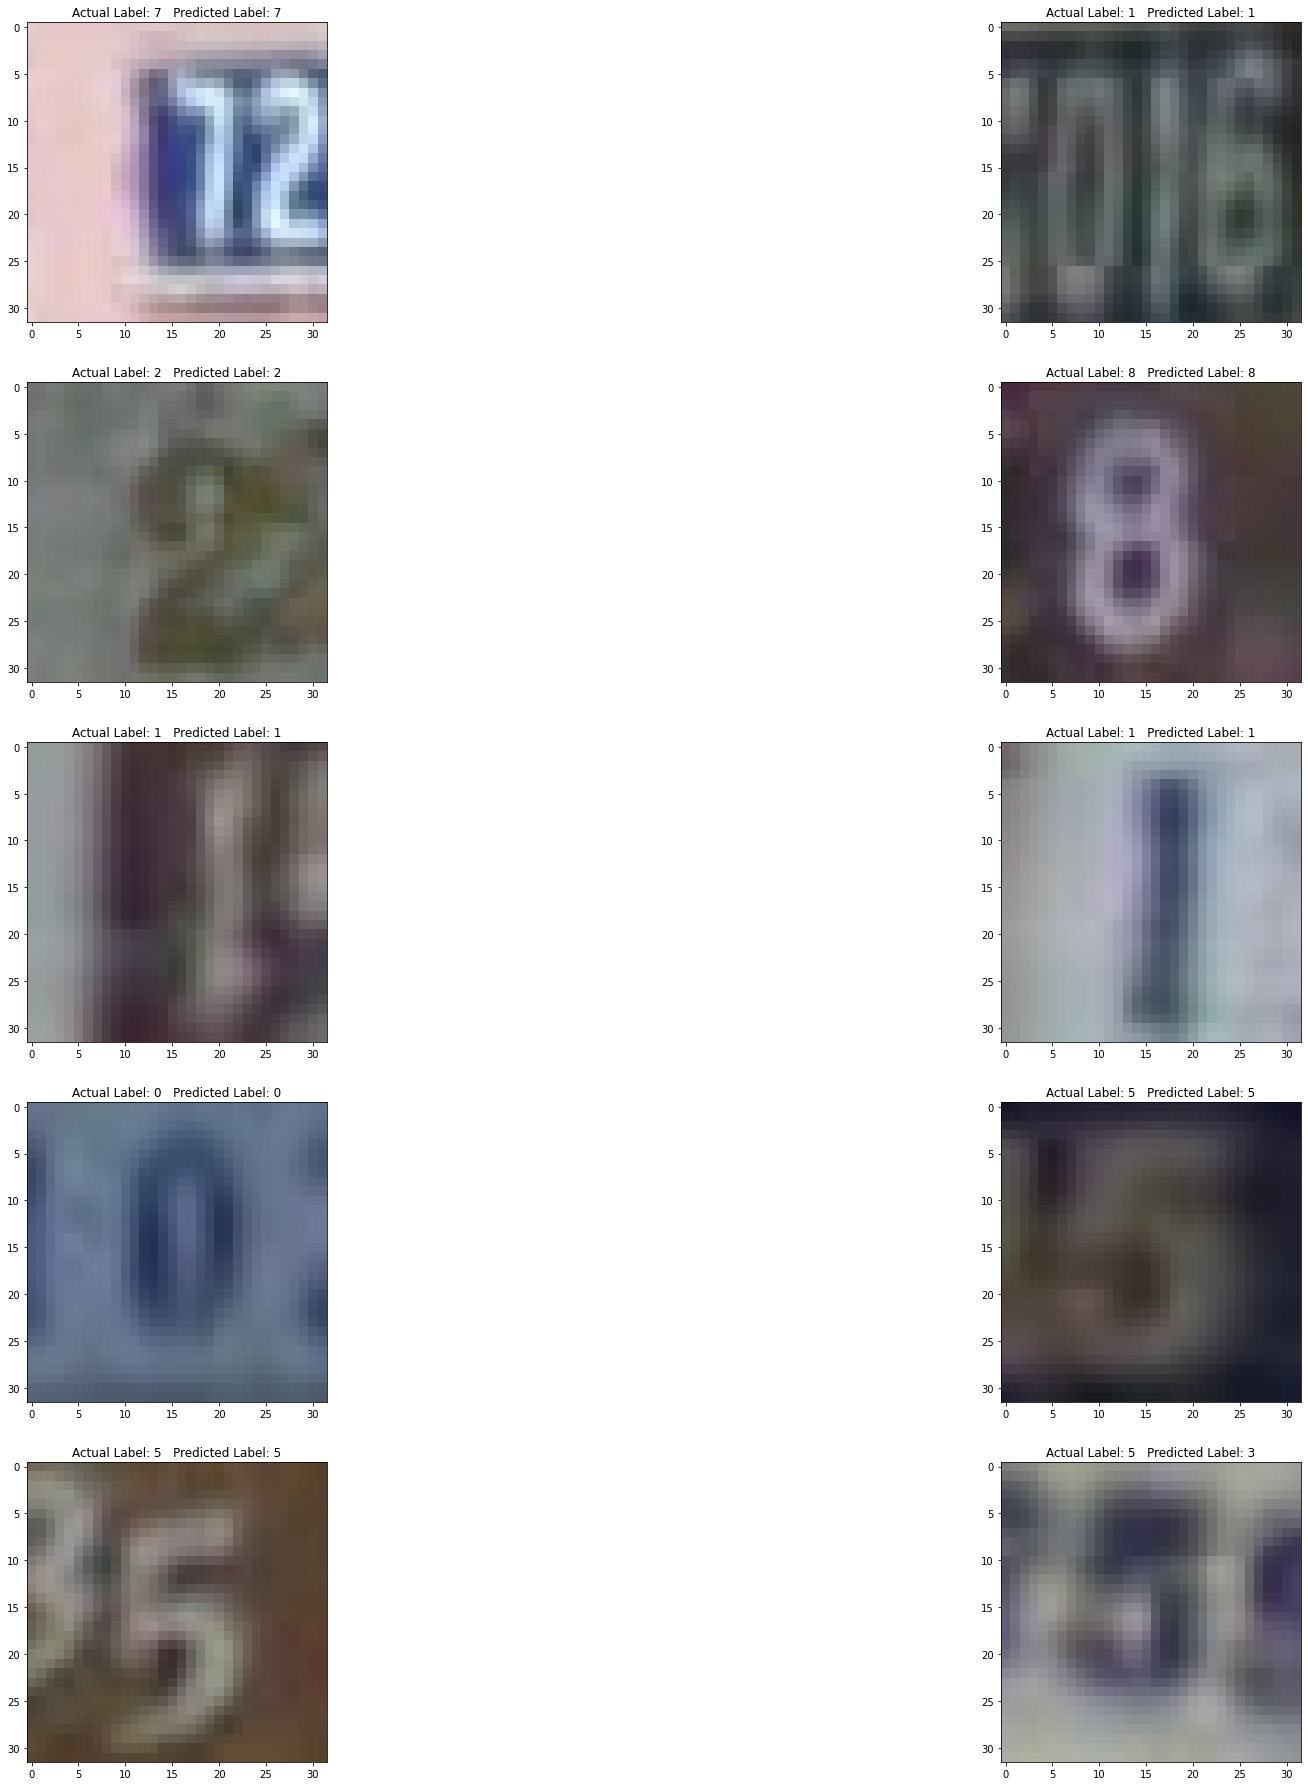

In [16]:
# Display 10 random testing images and their predicted and actual label
y_te_pred = model.predict(X_te)
n = X_te.shape[0]
s = 10
f, ax = plt.subplots(s//2, 2, figsize=(32, 32))
rand_ind = np.random.randint(0, high=n, size=s)
for i, ind in zip(range(s),rand_ind):
    ax[i//2][i%2].imshow(X_te[ind,:,:,:])
    ax[i//2][i%2].set_title("Actual Label: {}   Predicted Label: {}".format(y_te[ind][0], np.argmax(y_te_pred[ind])))